In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def load_data(filepath, target_column):
    df = pd.read_csv(filepath)
    df = df.drop(columns=['zipcode'])
    X = df.drop(columns=[target_column])
    y = df[target_column]
    return X, y

train_filepath = "data_for_KNN_train.csv"
test_filepath = "data_for_KNN_test.csv"
target_column = "log_price"

X_train, y_train = load_data(train_filepath, target_column)
X_test, y_test = load_data(test_filepath, target_column)

X_train = X_train.replace('1m', np.nan).fillna(0.5).astype(float)
X_test = X_test.replace('1m', np.nan).fillna(0.5).astype(float)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on training and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred_test)

# Calculate percentage accuracy for test
test_accuracy_percent = 100 * (1 - np.abs((y_pred_test - y_test) / (y_test + 1e-10))).mean()

print(f"Test Percentage Accuracy: {test_accuracy_percent:.2f}%")

Test Percentage Accuracy: 94.30%


In [29]:
r2_score_value = model.score(X_test, y_test)

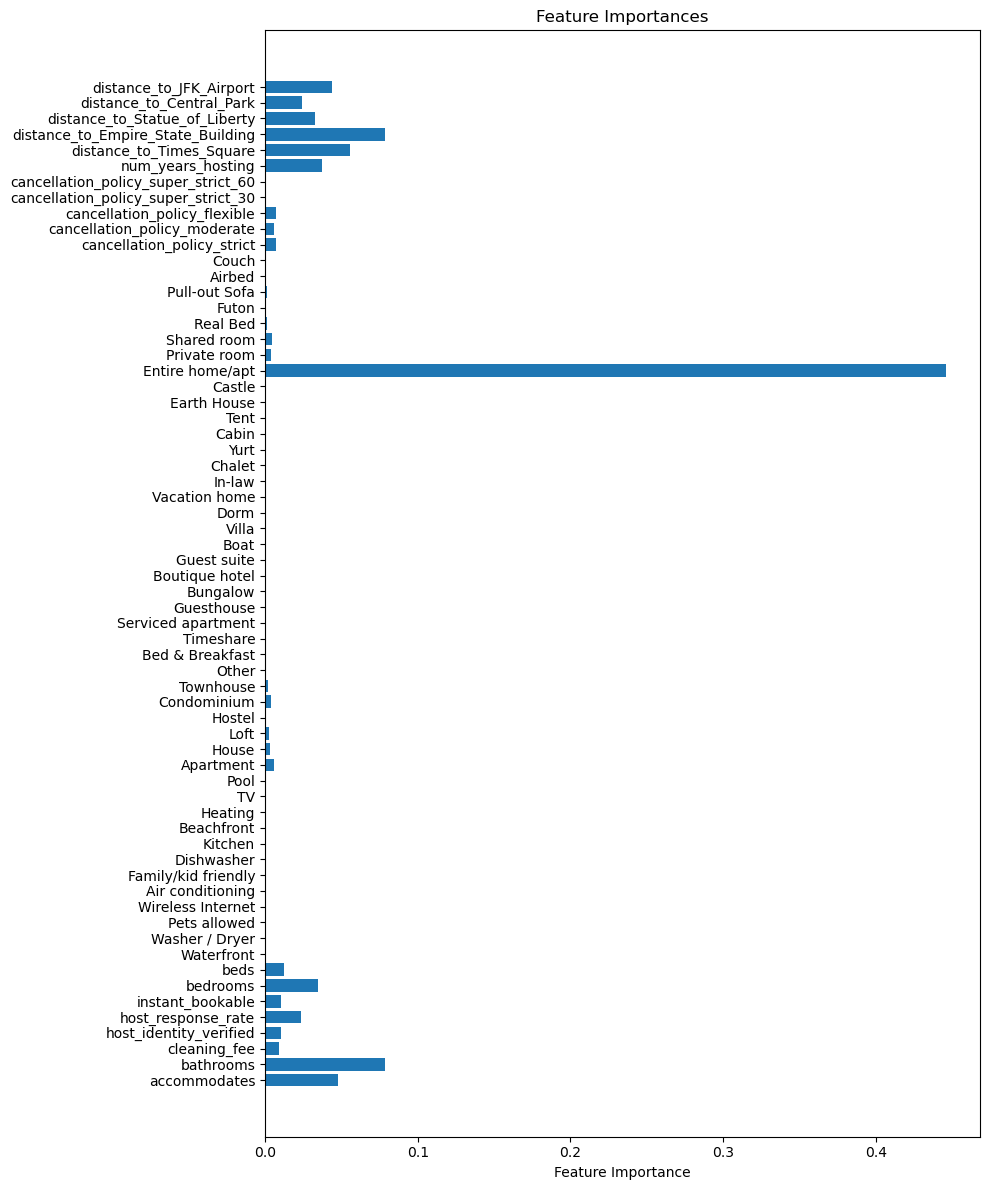

In [30]:
feature_importances = model.feature_importances_

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))  # Increase figure size for better visibility
plt.barh(X_train.columns, feature_importances)

# Add labels and title
plt.xlabel("Feature Importance")
plt.title("Feature Importances")

# Adjust spacing between y-ticks (feature names) to avoid overlap
plt.yticks(rotation=0)  # Keep labels horizontal
plt.tight_layout()  # Adjust spacing to make the plot more readable
plt.show()

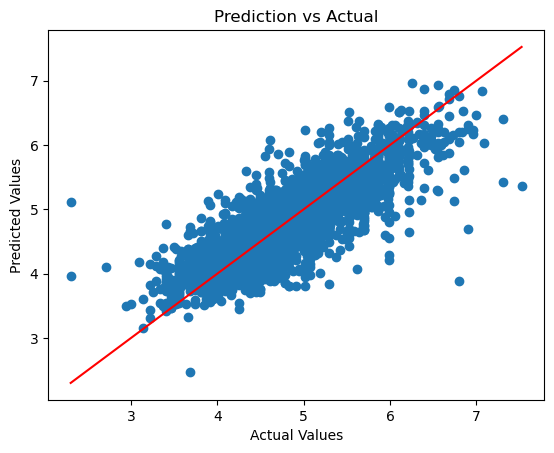

In [31]:
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on training and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate Mean Absolute Error (MAE) for test data
test_mae = mean_absolute_error(y_test, y_pred_test)

# Calculate R² for test data
r2_score_value = model.score(X_test, y_test)

# Calculate percentage accuracy for test data
test_accuracy_percent = 100 * (1 - np.abs((y_pred_test - y_test) / (y_test + 1e-10))).mean()

# Print results
print(f"Test MAE: {test_mae:.2f}")
print(f"Test R²: {r2_score_value:.2f}")
print(f"Test Percentage Accuracy: {test_accuracy_percent:.2f}%")